<a href="https://colab.research.google.com/github/IshanHegde/Comparision-of-Binary-Classification-Models-on-Bank-Deposit-sales-campaign/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams["figure.figsize"]=(15,10)


## Importing file 

### Reupload the file everytime you start a new session



In [4]:
df = pd.read_csv(r'/content/bank.csv')

In [5]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,married,single,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [6]:
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,married,single,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,-0.981360,1.423289,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [14]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.25, random_state=42)

In [8]:
X_train.shape

(8371, 42)

## Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
a = clf.predict_proba(X_test)

array([[0.67877661, 0.32122339],
       [0.01757501, 0.98242499],
       [0.40214143, 0.59785857],
       ...,
       [0.82113237, 0.17886763],
       [0.69073226, 0.30926774],
       [0.04798034, 0.95201966]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)


(1225, 225, 299, 1042)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.7770320656226697
0.8448275862068966


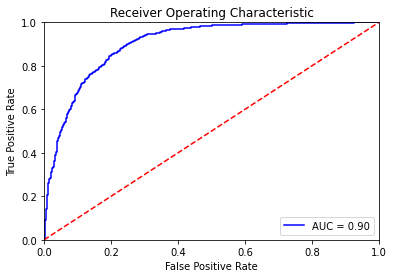

In [ ]:

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Decision Tree


In [ ]:

dt_clf=DecisionTreeClassifier(random_state=42)

path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

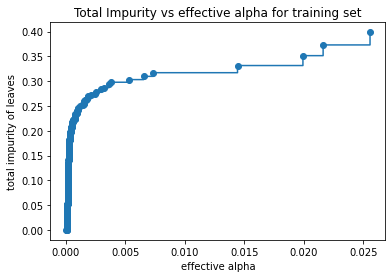

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09978265991068874


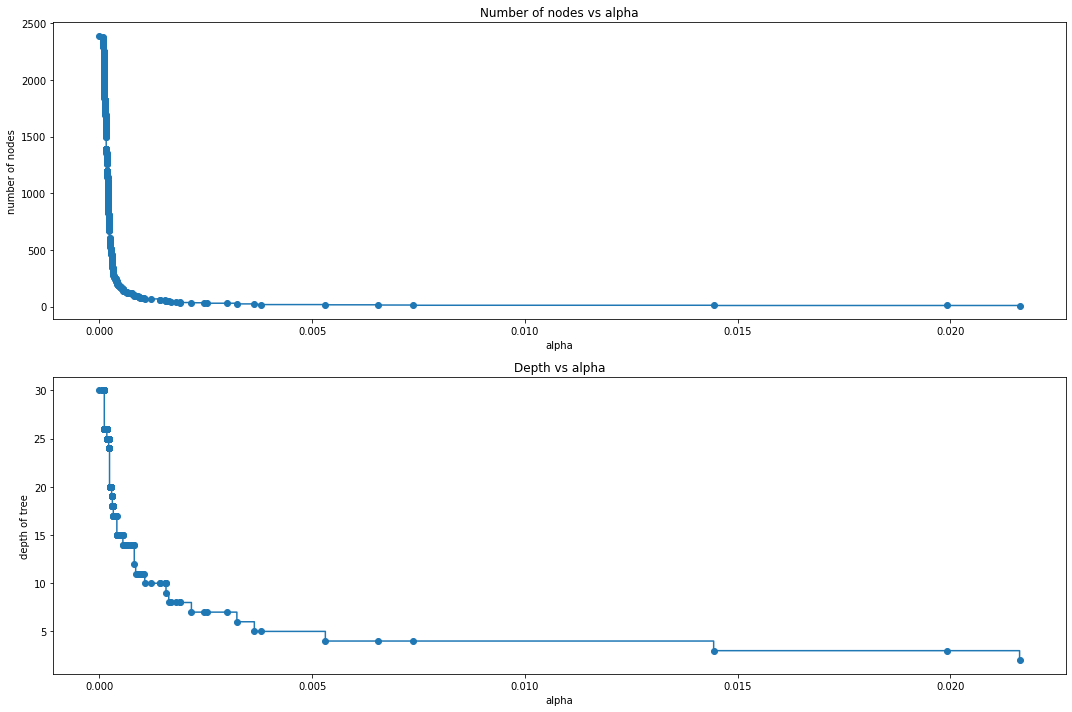

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

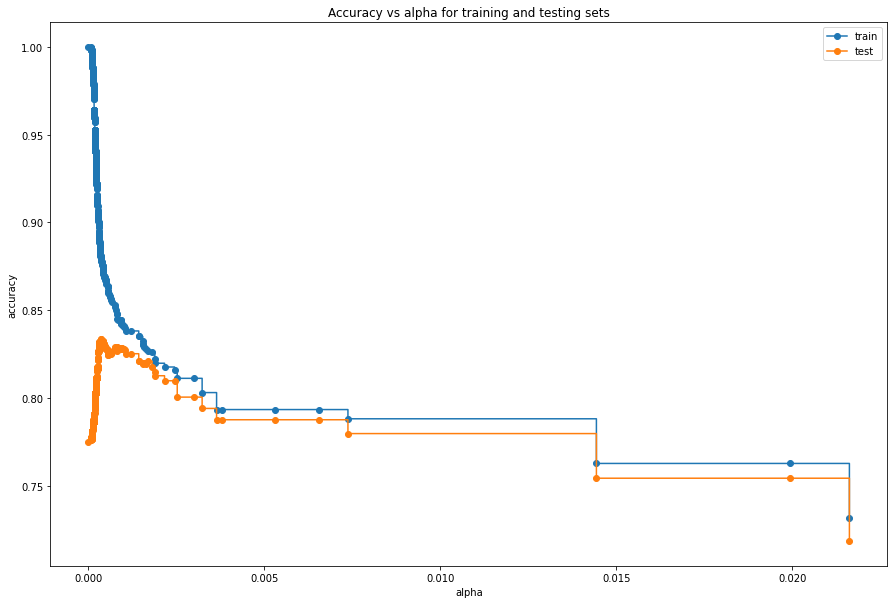

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Best Tree Pruning Hyper-parameter which maximizes the accuracy of the test 

max_alpha=clfs[np.argmax(test_scores)].ccp_alpha
print(max_alpha)

0.00034451777480800803


In [ ]:
dt_clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0025).fit(X_train,y_train)

In [ ]:
y_pred = dt_clf.predict(X_test)

[Text(418.5, 509.625, 'X[6] <= -0.477\ngini = 0.498\nsamples = 8371\nvalue = [4423, 3948]'),
 Text(209.25, 441.675, 'X[40] <= 1.372\ngini = 0.324\nsamples = 3425\nvalue = [2729, 696]'),
 Text(156.9375, 373.725, 'X[34] <= 3.061\ngini = 0.267\nsamples = 3189\nvalue = [2682, 507]'),
 Text(104.625, 305.775, 'X[6] <= -0.716\ngini = 0.246\nsamples = 3115\nvalue = [2667, 448]'),
 Text(52.3125, 237.825, 'gini = 0.107\nsamples = 1674\nvalue = [1579, 95]'),
 Text(156.9375, 237.825, 'X[3] <= -0.054\ngini = 0.37\nsamples = 1441\nvalue = [1088, 353]'),
 Text(104.625, 169.875, 'gini = 0.208\nsamples = 704\nvalue = [621, 83]'),
 Text(209.25, 169.875, 'X[28] <= 1.515\ngini = 0.464\nsamples = 737\nvalue = [467, 270]'),
 Text(156.9375, 101.92500000000001, 'X[8] <= -0.178\ngini = 0.439\nsamples = 670\nvalue = [452, 218]'),
 Text(104.625, 33.97500000000002, 'gini = 0.392\nsamples = 569\nvalue = [417, 152]'),
 Text(209.25, 33.97500000000002, 'gini = 0.453\nsamples = 101\nvalue = [35, 66]'),
 Text(261.5625,

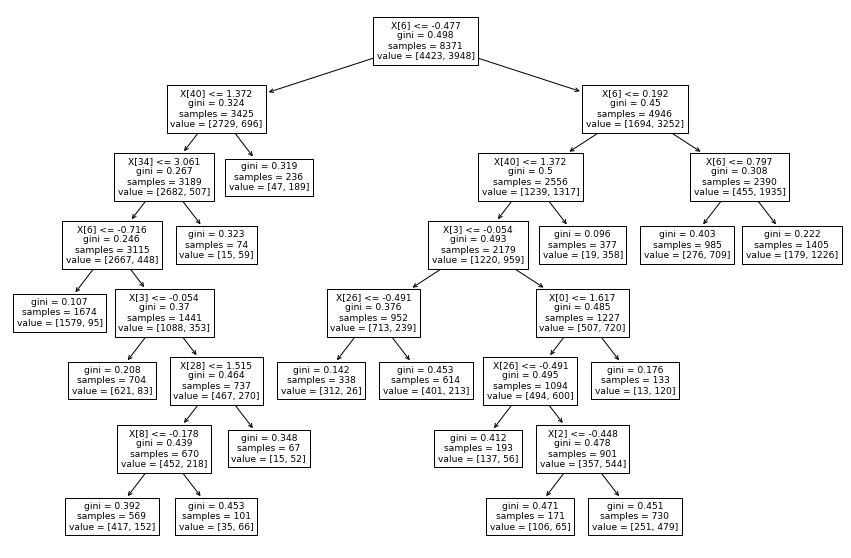

In [ ]:
# Do not use the function if ccp_alpha=0 (default value)
tree.plot_tree(dt_clf)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1167, 283, 248, 1093)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.8150633855331841
0.8048275862068965


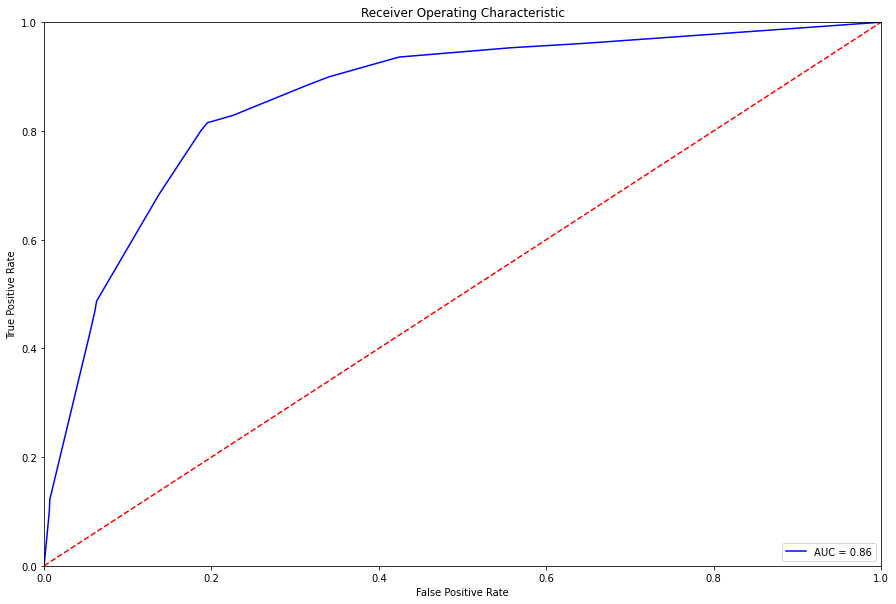

In [ ]:
probs = dt_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest regressor

In [31]:
rf_clf = RandomForestClassifier( random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
y_pred=rf_clf.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1190, 260, 172, 1169)

In [34]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.8717375093214019
0.8206896551724138


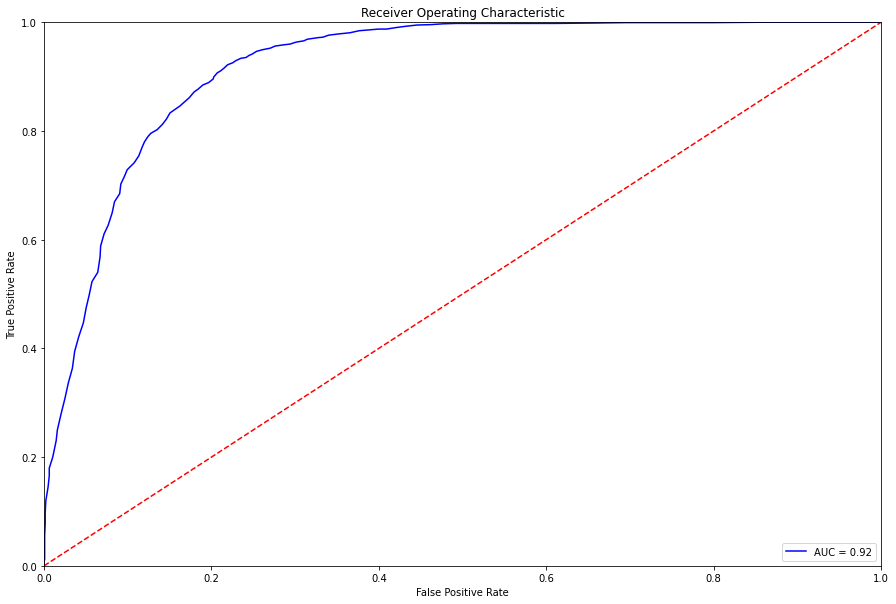

In [35]:
probs = rf_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost 

## KNN

In [58]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [59]:
y_pred=neigh.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1276, 174, 526, 815)

In [61]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.6077554064131245
0.88


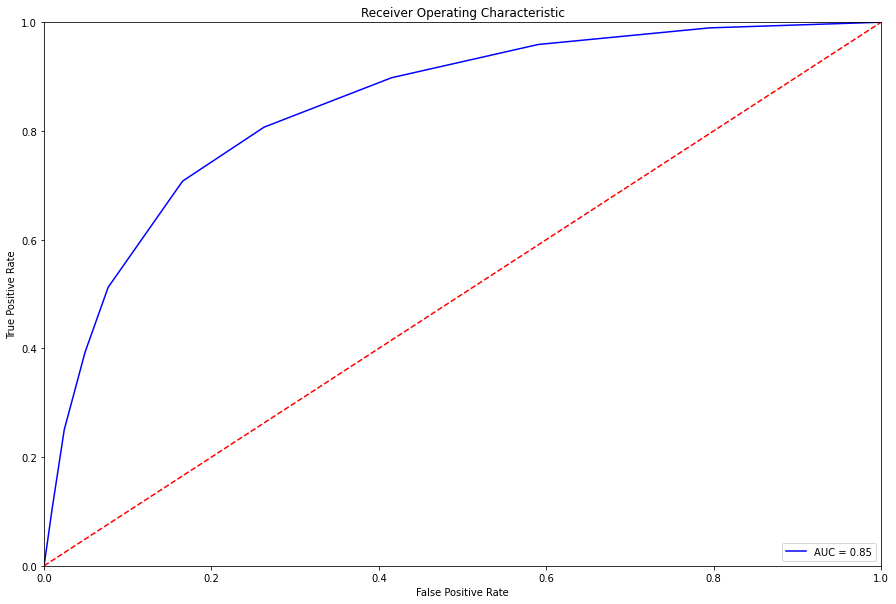

In [62]:
probs = neigh.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()